In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_data_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
mouse_clinical_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = mouse_clinical_data_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]


tumor_vol_group = tumor_vol.groupby(["Drug", "Timepoint"])

tumor_vol_mean = tumor_vol_group.mean()

# Convert to DataFrame

tumor_vol_df = pd.DataFrame(tumor_vol_mean)

# Preview DataFrame
tumor_vol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = tumor_vol.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
tumor_vol_sem = pd.DataFrame(sem)
# Preview DataFrame
tumor_vol_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
tumor_vol_format = tumor_vol_df.reset_index()

In [5]:
tumor_vol_format_new = tumor_vol_format.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview the Data Frame
tumor_vol_format_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


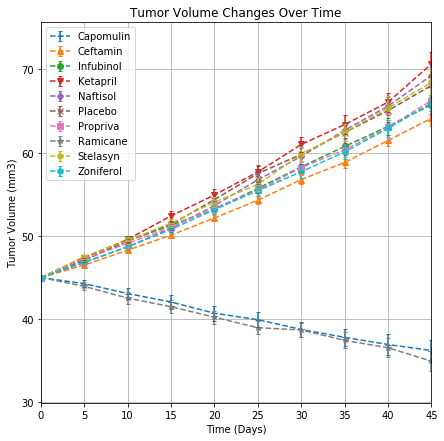

<Figure size 720x720 with 0 Axes>

In [31]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
# markers = ['+', '^', 'o', 'v', 'd','x','s','*','p','h',]
# drug_list=0
# for drug in tumor_vol_df:
#     drug_list +=1
plt.figure(figsize=(7,7))
plt.errorbar(x_axis, tumor_vol_df.loc["Capomulin", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Capomulin", "Tumor Volume (mm3)"], fmt="+--", barsabove=True, capsize=2, label="Capomulin")
plt.errorbar(x_axis, tumor_vol_df.loc["Ceftamin", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Ceftamin", "Tumor Volume (mm3)"], fmt="^--", barsabove=True, capsize=2, label="Ceftamin")
plt.errorbar(x_axis, tumor_vol_df.loc["Infubinol", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Infubinol", "Tumor Volume (mm3)"], fmt="o--", barsabove=True, capsize=2, label="Infubinol")
plt.errorbar(x_axis, tumor_vol_df.loc["Ketapril", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Ketapril", "Tumor Volume (mm3)"], fmt="v--", barsabove=True, capsize=2, label="Ketapril")
plt.errorbar(x_axis, tumor_vol_df.loc["Naftisol", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Naftisol", "Tumor Volume (mm3)"], fmt="d--", barsabove=True, capsize=2, label="Naftisol")
plt.errorbar(x_axis, tumor_vol_df.loc["Placebo", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Placebo", "Tumor Volume (mm3)"], fmt="x--", barsabove=True, capsize=2, label="Placebo")
plt.errorbar(x_axis, tumor_vol_df.loc["Propriva", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Propriva", "Tumor Volume (mm3)"], fmt="s--", barsabove=True, capsize=2, label="Propriva")
plt.errorbar(x_axis, tumor_vol_df.loc["Ramicane", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Ramicane", "Tumor Volume (mm3)"], fmt="*--", barsabove=True, capsize=2, label="Ramicane")
plt.errorbar(x_axis, tumor_vol_df.loc["Stelasyn", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Stelasyn", "Tumor Volume (mm3)"], fmt="p--", barsabove=True, capsize=2, label="Stelasyn")
plt.errorbar(x_axis, tumor_vol_df.loc["Zoniferol", "Tumor Volume (mm3)"], yerr=tumor_vol_sem.loc["Zoniferol", "Tumor Volume (mm3)"], fmt="h--", barsabove=True, capsize=2, label="Zoniferol")


plt.title("Tumor Volume Changes Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(min(tumor_vol_df["Tumor Volume (mm3)"]-5), max(tumor_vol_df["Tumor Volume (mm3)"]+5))
plt.grid()
plt.legend(loc="best")
plt.figure(figsize=(10,10))
# Save the Figure
plt.savefig("tumor_vol.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = mouse_clinical_data_df[["Drug", "Timepoint", "Metastatic Sites"]]


meta_site_group = meta_site.groupby(["Drug", "Timepoint"])

meta_site_mean = meta_site_group.mean()
# Convert to DataFrame
meta_site_df = pd.DataFrame(meta_site_mean)
# Preview DataFrame
meta_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem = meta_site.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
meta_site_sem = pd.DataFrame(sem)
# Preview DataFrame
meta_site_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
meta_site_format = meta_site_df.reset_index()

In [11]:
# # Minor Data Munging to Re-Format the Data Frames
meta_site_format_new = meta_site_format.pivot(columns="Timepoint", index="Drug", values="Metastatic Sites")
# # Preview that Reformatting worked
meta_site_format_new.head()

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,0.0,0.160000,0.320000,0.375000,0.652174,0.818182,1.090909,1.181818,1.380952,1.476190
Ceftamin,0.0,0.380952,0.600000,0.789474,1.111111,1.500000,1.937500,2.071429,2.357143,2.692308
Infubinol,0.0,0.280000,0.666667,0.904762,1.050000,1.277778,1.588235,1.666667,2.100000,2.111111
Ketapril,0.0,0.304348,0.590909,0.842105,1.210526,1.631579,2.055556,2.294118,2.733333,3.363636
Naftisol,0.0,0.260870,0.523810,0.857143,1.150000,1.500000,2.066667,2.266667,2.466667,2.538462


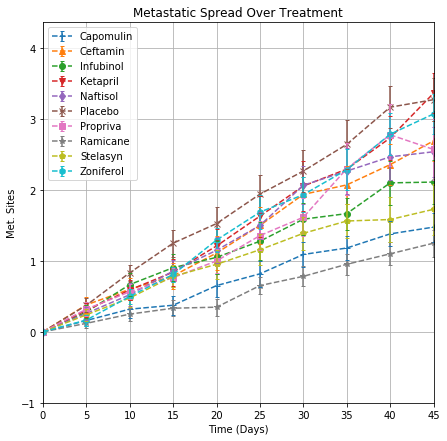

<Figure size 720x720 with 0 Axes>

In [30]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

plt.figure(figsize=(7,7))
plt.errorbar(x_axis, meta_site_df.loc["Capomulin", "Metastatic Sites"], yerr=meta_site_sem.loc["Capomulin", "Metastatic Sites"], fmt="+--", barsabove=True, capsize=2, label="Capomulin")
plt.errorbar(x_axis, meta_site_df.loc["Ceftamin", "Metastatic Sites"], yerr=meta_site_sem.loc["Ceftamin", "Metastatic Sites"], fmt="^--", barsabove=True, capsize=2, label="Ceftamin")
plt.errorbar(x_axis, meta_site_df.loc["Infubinol", "Metastatic Sites"], yerr=meta_site_sem.loc["Infubinol", "Metastatic Sites"], fmt="o--", barsabove=True, capsize=2, label="Infubinol")
plt.errorbar(x_axis, meta_site_df.loc["Ketapril", "Metastatic Sites"], yerr=meta_site_sem.loc["Ketapril", "Metastatic Sites"], fmt="v--", barsabove=True, capsize=2, label="Ketapril")
plt.errorbar(x_axis, meta_site_df.loc["Naftisol", "Metastatic Sites"], yerr=meta_site_sem.loc["Naftisol", "Metastatic Sites"], fmt="d--", barsabove=True, capsize=2, label="Naftisol")
plt.errorbar(x_axis, meta_site_df.loc["Placebo", "Metastatic Sites"], yerr=meta_site_sem.loc["Placebo", "Metastatic Sites"], fmt="x--", barsabove=True, capsize=2, label="Placebo")
plt.errorbar(x_axis, meta_site_df.loc["Propriva", "Metastatic Sites"], yerr=meta_site_sem.loc["Propriva", "Metastatic Sites"], fmt="s--", barsabove=True, capsize=2, label="Propriva")
plt.errorbar(x_axis, meta_site_df.loc["Ramicane", "Metastatic Sites"], yerr=meta_site_sem.loc["Ramicane", "Metastatic Sites"], fmt="*--", barsabove=True, capsize=2, label="Ramicane")
plt.errorbar(x_axis, meta_site_df.loc["Stelasyn", "Metastatic Sites"], yerr=meta_site_sem.loc["Stelasyn", "Metastatic Sites"], fmt="p--", barsabove=True, capsize=2, label="Stelasyn")
plt.errorbar(x_axis, meta_site_df.loc["Zoniferol", "Metastatic Sites"], yerr=meta_site_sem.loc["Zoniferol", "Metastatic Sites"], fmt="h--", barsabove=True, capsize=2, label="Zoniferol")


plt.title("Metastatic Spread Over Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.xlim(0,45)
plt.ylim(min(meta_site_df["Metastatic Sites"]-1), max(meta_site_df["Metastatic Sites"]+1))
plt.grid()
plt.legend(loc="best")
plt.figure(figsize=(10,10))
# Save the Figure
plt.savefig("meta_site_change.png")

# Show the Figure

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_clinical_data_df[["Drug", "Timepoint", "Mouse ID"]]

mice_count_group = mice_count.groupby(["Drug", "Timepoint"])

mice_total_count = mice_count_group.count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_total_count)
# Preview DataFrame
mice_count_df = mice_count_df.rename(columns={"Mouse ID": "Mouse Count"})

mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [14]:
mice_count_df["Survival Rate"] = mice_count_df["Mouse Count"]/25*100
mice_count_df.head()

Mouse Count  Survival Rate
Drug      Timepoint                            
Capomulin 0                   25          100.0
          5                   25          100.0
          10                  25          100.0
          15                  24           96.0
          20                  23           92.0

In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_format = mice_count_df.reset_index()

In [16]:
mice_count_format_new = mice_count_format.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
mice_count_format_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


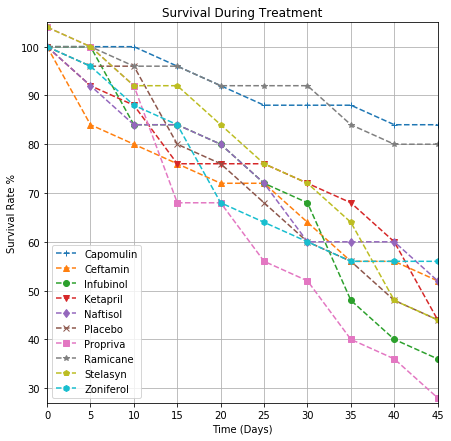

In [29]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0,50,5)

plt.figure(figsize=(7,7))
plt.plot(x_axis, mice_count_df.loc["Capomulin", "Survival Rate"],marker="+", linestyle="dashed",label="Capomulin")
plt.plot(x_axis, mice_count_df.loc["Ceftamin", "Survival Rate"],marker="^", linestyle="dashed",label="Ceftamin")
plt.plot(x_axis, mice_count_df.loc["Infubinol", "Survival Rate"],marker="o", linestyle="dashed",label="Infubinol")
plt.plot(x_axis, mice_count_df.loc["Ketapril", "Survival Rate"],marker="v", linestyle="dashed",label="Ketapril")
plt.plot(x_axis, mice_count_df.loc["Naftisol", "Survival Rate"],marker="d", linestyle="dashed",label="Naftisol")
plt.plot(x_axis, mice_count_df.loc["Placebo", "Survival Rate"],marker="x", linestyle="dashed",label="Placebo")
plt.plot(x_axis, mice_count_df.loc["Propriva", "Survival Rate"],marker="s", linestyle="dashed",label="Propriva")
plt.plot(x_axis, mice_count_df.loc["Ramicane", "Survival Rate"],marker="*", linestyle="dashed",label="Ramicane")
plt.plot(x_axis, mice_count_df.loc["Stelasyn", "Survival Rate"],marker="p", linestyle="dashed",label="Stelasyn")
plt.plot(x_axis, mice_count_df.loc["Zoniferol", "Survival Rate"],marker="h", linestyle="dashed",label="Zoniferol")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.xlim(0,45)
plt.ylim(min(mice_count_df["Survival Rate"]-1), max(mice_count_df["Survival Rate"]+1))
plt.grid()
plt.legend(loc="best")
# Save the Figure
plt.savefig("mouse_survival.png")

# Show the Figure


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
capo_vol_change = (((tumor_vol_df.loc["Capomulin", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Capomulin", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Capomulin", "Tumor Volume (mm3)"][0]))*100
ceft_vol_change = (((tumor_vol_df.loc["Ceftamin", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Ceftamin", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Ceftamin", "Tumor Volume (mm3)"][0]))*100
infu_vol_change = (((tumor_vol_df.loc["Infubinol", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Infubinol", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Infubinol", "Tumor Volume (mm3)"][0]))*100
keta_vol_change = (((tumor_vol_df.loc["Ketapril", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Ketapril", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Ketapril", "Tumor Volume (mm3)"][0]))*100
naft_vol_change = (((tumor_vol_df.loc["Naftisol", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Naftisol", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Naftisol", "Tumor Volume (mm3)"][0]))*100
plac_vol_change = (((tumor_vol_df.loc["Placebo", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Placebo", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Placebo", "Tumor Volume (mm3)"][0]))*100
prop_vol_change = (((tumor_vol_df.loc["Propriva", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Propriva", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Propriva", "Tumor Volume (mm3)"][0]))*100
rami_vol_change = (((tumor_vol_df.loc["Ramicane", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Ramicane", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Ramicane", "Tumor Volume (mm3)"][0]))*100
stel_vol_change = (((tumor_vol_df.loc["Stelasyn", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Stelasyn", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Stelasyn", "Tumor Volume (mm3)"][0]))*100
zoni_vol_change = (((tumor_vol_df.loc["Zoniferol", "Tumor Volume (mm3)"][45]) - (tumor_vol_df.loc["Zoniferol", "Tumor Volume (mm3)"][0]))/(tumor_vol_df.loc["Zoniferol", "Tumor Volume (mm3)"][0]))*100

# Display the data to confirm
total_vol_change_df = pd.DataFrame ({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
                                    "Percent Change": [capo_vol_change, ceft_vol_change, infu_vol_change, keta_vol_change, naft_vol_change, plac_vol_change, prop_vol_change, rami_vol_change, stel_vol_change, zoni_vol_change]})
total_vol_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [19]:
total_vol_change_df["Pass?"] = total_vol_change_df["Percent Change"] < 0
total_vol_change_df

,Drug,Percent Change,Pass?
0,Capomulin,-19.475303,True
1,Ceftamin,42.516492,False
2,Infubinol,46.123472,False
3,Ketapril,57.028795,False
4,Naftisol,53.923347,False
5,Placebo,51.297960,False
6,Propriva,47.241175,False
7,Ramicane,-22.320900,True
8,Stelasyn,52.085134,False
9,Zoniferol,46.579751,False


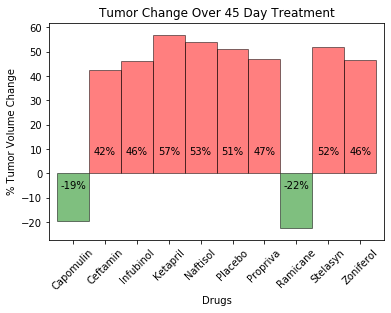

In [28]:
# Store all Relevant Percent Changes into a Tuple
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

# Call functions to implement the function calls
bar1 = plt.bar("Capomulin", capo_vol_change, color="green", alpha=0.5, ec="black", width=1)
bar2 = plt.bar("Ceftamin", ceft_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar3 = plt.bar("Infubinol", infu_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar4 = plt.bar("Ketapril", keta_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar5 = plt.bar("Naftisol", naft_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar6 = plt.bar("Placebo", plac_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar7 = plt.bar("Propriva", prop_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar8 = plt.bar("Ramicane", rami_vol_change, color="green", alpha=0.5, ec="black", width=1)
bar9 = plt.bar("Stelasyn", stel_vol_change, color="red", alpha=0.5, ec="black", width=1)
bar10 = plt.bar("Zoniferol", zoni_vol_change, color="red", alpha=0.5, ec="black", width=1)

plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(min(total_vol_change_df["Percent Change"])-5, max(total_vol_change_df["Percent Change"])+5)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.xticks(rotation=45)

# Save the Figure
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.,-7,
                '%d' % int(height) + "%",
                ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar8)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.,7,
                '%d' % int(height) + "%",
                ha='center', va='bottom')
        
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)
autolabel(bar7)
autolabel(bar9)
autolabel(bar10)
# Show the Figure
plt.savefig("percent_change.png")


![Metastatic Spread During Treatment](../Images/change.png)